# PHYS 267 - Chapter 10<br><font color='blue'>Parameter Estimation & Statistical Modelling</font>
###### Last Updated: Jan 9, 2023 by Dr. Brenda Lee
***

### <font color="blue">10.1 Chapter Overview</font>

Sometimes, it's not enough to get a yes or no decision on a hypothesis. For example, will it suffice to answer "Is this dataset consistent with the existence of a boson?" or should we try to estimate the value of one or more parameters? In this case, we would want to rephrase our question to something like this: "Based on this data, what is the mass of the boson?" This problem of parameter estimation is closely related to that of hypothesis testing. You can think of there being a family of hypotheses, with some adjustable parameter $\theta$ (like a function with an unknown parameter or constant). If we try to use different values of $\theta$, which specific value is the "best", and what range of $\theta$ is "acceptable"? These are the types of questions we try to answer using parameter estimation. 

But, that's not all. Where else can we apply such concepts? Well, many scientific problems are concerned with determining a relationship between a set of variables. We end up with the need to solve an *estimation problem*, which starts with the desire to infer something meaningful from a set of data. For parametric estimation, the strategy is to postulate a model for the data and then use the data to fit model parameters. This leads to two fundamental questions: where do we get the model, and how do we estimate the parameters? Let's take a look in this chapter. 

<div class="alert alert-block alert-info">💎<b>Chapter Objectives</b>:<br>
    <ol>
        <li>Understand the concepts behind parameter estimation</li>
        <li>Know how to generate a statistical model for a given problem</li>
        <li>Apply programming knowledge to plot a best fit curve and determine its goodness of fit</li>
    </ol>
</div>

### <font color="blue">10.2 Parameter Estimation using Maximum Likelihood</font>

There is a substantial difference in approach between hypothesis tests and statistical modelling. With hypothesis tests, one typically starts out with a null hypothesis. Based on the question and the data, we would then select the appropriate statistical test as well as the desired significance level. Once we have done that, we would either accept or reject the null hypothesis through applying a suitable hypothesis test. 

With statistical modeling, we take a more interactive approach to our data analysis. We start with a visual inspection of the data and look for correlations or relationships amongst variables. Based on this first inspection, a statistical model is selected that may describe the data. In the most simplest of cases, we would have a linear model, where: $$Y = aX + \epsilon$$

where you as the experimenter would provide an input value for $X$ and read off something directly proportional to $X$ as the measurement $Y$ with some additive noise $\epsilon$ that we attribute to jitter in the instrumentation. We then estimate the parameter $a$ in the model, given some postulated claim about the nature of $\epsilon$. Now, how to compute this depends entirely on your methodology and whether you have a parametric or nonparametric variable. 

1. **Parametric Parameter Estimation**: We assume we know the density function of the data and then try to derive the embedded parameters for it
2. **Non-Parametric Parameter Estimation**: We claim to know that the density function is a member of a broad class of density functions and then use the data to characterize a member of that class

Our focus will be on *parametric* estimation. We are going to let $X_1, ..., X_n$ be a random sample from a distribution $F_\theta$ that is specified up to a vector of unknown parameters $\theta$. For instance, the sample can come from a Poisson distribution whose mean value is unknown, or it can be from a normal distrnibution with an unknown mean and variance. Whereas in probability theory it is usual to supposed that all of the parameters of a distribution are known, the opposite is true in statistics, where a central problem is to use the observed data to make inferences about the unknown parameters. 

As a quick overview, we are first going to present the *maximum likelihood* method for determinining estimators of unknown parameters. The estimates obtained are called *point estimates* because they specify a single quantity as an estimate of $\theta$. After this, we want to obtain an *interval* of estimates, and how much confidence we can assign to our interval estimate. 

Any statistic used to estimate the value of an unknown parameter $\theta$ is called an **estimator** of $\theta$. THe observed value of the estimator is called the **estimate**. For example, the usual estimator of the mean of a normal population, based on a sample $X_1, ..., X_n$ from that population, is the mean of the sample. If a sample of size 3 yields the data $X_1=2, X_2=3, X_3=4$, then the estiamte of the population mean, resulting from the estimator $\overline{X} = \sum_i X_i/n$ is the value 3.

Let's suppose that the random variables $X_1, ..., X_n$, whose joint distribution is assumed given, except for an unknown parameter $\theta$, are to be observed. The problem of interest is to use the observed values to estimate $\theta$. In such a case, we want to create a **joint density function** of the random variables, which gives us the total probability of observing the data given a parameter of $\lambda$. 

$$f(x_1, x_2, ..., x_n | \lambda) = \prod_{i=1}^n f(x_i|\lambda)$$

We call this, the **likelihood function**. By maximizing this function, we are going to get "**maximum likelihood estimates**" - estimated parameters for population distribution. But, in order to maximize this function, we have to differentiate the function and set it to zero before finding the parameter of interest. To help make differentiation easier, we take the natural logarithm of the expression and replace the multiplication with a sum. By doing this, we obtain the **log-likelihood function**, given as:

$$\ln \prod_{i=1}^n f(x_i|\lambda) = \sum_{i=1}^n \ln f(x_i|\lambda)$$

When we differentiate this and set the slope equal to zero, we know that we can find the extrema of the likelihood function. Do we want to do this by hand? Not really (though if you're interested, we can discuss this outside of the class)! Let's see what we can do with our knowledge of Python!

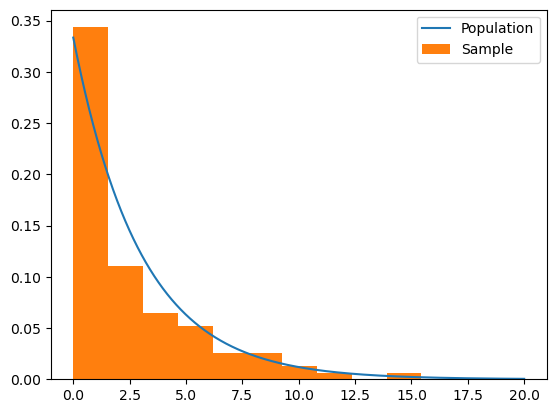

In [7]:
# Example 1: MLE (Maximum Likelihoood Estimation) from the Basics
# Let's take a look at an exponential distribution
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt


# Generate exponential data
population_rate, sample_size = 3, 100
expon_sample = lambda n: np.random.exponential(population_rate, n)
xVals = np.arange(0, 20, 0.001)
yVals = expon.pdf(xVals, scale=population_rate)
plt.plot(xVals, yVals, label="Population")

sample = expon_sample(sample_size)
plt.hist(sample, density=True, label="Sample")
plt.legend()
plt.show()

parameter value:  2.6700000000000017


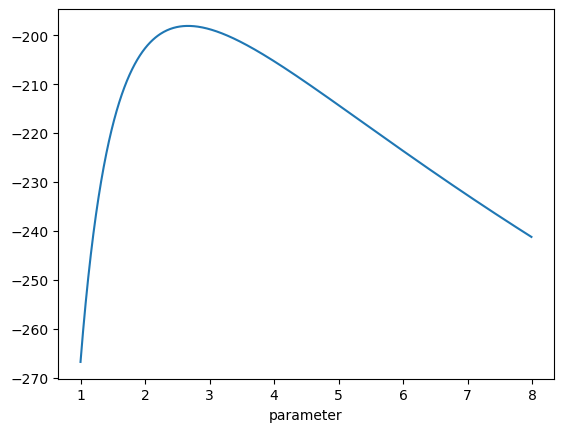

In [8]:
# Let's try to find the maxima of the function

log_likelihood = lambda rate: sum([np.log(expon.pdf(v, scale=rate)) for v in sample])

rates = np.arange(1, 8, 0.01)
estimates = [log_likelihood(r) for r in rates]

plt.xlabel('parameter')
plt.plot(rates, estimates)
print('parameter value: ', rates[estimates.index(max(estimates))])

In [9]:
# Example 2: Simulating an MLE - Simulating a Coin-Flipping Experiment
# Suppose we have a coin and want to estimate the probability of heads (p) for it
  # We can model the distribution of heads and tails as a Bernoulli distribution with a specific PMF
  # 1 means heads, 0 means tails

from scipy.stats import bernoulli
p_true = 1/2                # Try to estimate this!
fp = bernoulli (p_true)     # Create Bernoulli random variables
xs = fp.rvs(100)            # Generate some samples
print(xs[:20])              # View the first 20 values

# We can write out the likelihood function using Sympy
import numpy as np
import sympy
x, p, z = sympy.symbols ('x p z', positive=True)    # Keep variables positive to simplify algorithm
phi = p**x*(1-p)**(1-x)                             # Bernoulli distribution function
L = np.prod([phi.subs(x,i) for i in xs])            # Likelihood function
print(L)                                            # Check to see if it's approximately 0.5

# Likelihood function is solely a function of unknown parameter p in this case
# To find the extrema of the likelihood function, we must log it and solve
logL = sympy.expand_log(sympy.log(L))
sol, = sympy.solve(sympy.diff(logL,p), p) 
# SOLVE function generates a list of a single element; comma unpacks it into 1 variable
print(sol)

[1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1]
p**51*(1 - p)**49
51/100


Above, we find two ways of getting maximum likelihood values. There is a lot of flexibility in how to obtain a maximum likelihood estimate, but also some "accepted" ways of doing so. We will not be going through these in this class as it depends on your field and application. But typically, one would use a combination of Seaborn and Statsmodels in Python for both regression and MLE analysis. 

### <font color="blue">10.3 Linear Regression Models</font>

One of the most important things when it comes to statistics is being able to create a model to represent your data, and to infer or predict results from it. It means that we first has to define a relationship in the data. Let's start with a linear model: $$y = kx+d$$

We would then perform the following procedures:
- the model parameters ($k$ and $d$) are determined
- the quality of the model is assessed
- and the residuals (the remaining errors) are inspected to check if the proposed model has missed essential features in the data
    - if the residuals are too large, or if the visual inspection of the residuals shows outliers or suggests another model, then the model is modified and the process is repeated until the results are satisfactory

This section will describe how to implement and solve linear regression models in Python. The resulting model parameters are discussed, as well as the assumptions of the models and interpretataions of the model results. 

#### 10.3.1 General Linear Regression Model

For two related variables, the **correlation** measures the association between the two variables. In contrast, a **linear regression** is used for the prediction of the value of one variable from another.

For example, we would use linear regression when we search for the best-fit line to a given data set ($x_i, y_i$) and are looking for the parameters ($k$, $d$) which minimize the sum of the squared residuals $\epsilon_i$ in:

$$y_i = kx_i + d + \epsilon_i$$

where $k$ is the slope or inclination of the line, and $d$ the intercept. The residuals are the differences between observed values and predicted values. Here is a sample piece of code to plot a graph and plot the line of best fit.

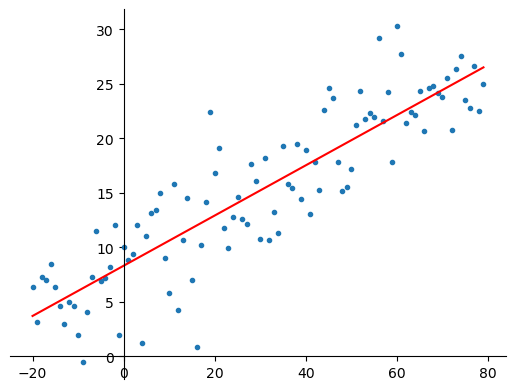

In [10]:
# Import standard packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the data
x = np.arange(-20, 80)
y = 10 + 0.2*x + 4*np.random.randn(len(x))

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x,y,'.')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

sns.despine()

# Draw the fitted line
p = np.polyfit(x,y, 1)
yFit = np.polyval(p, x)
ax.plot(x,yFit, 'r')
plt.show()

Since the linear regression equation is solved to minimize the square sum of the residuals, linear regression is also called **Ordinary Least-Squares (OLS) Regression**. In contrast to correlation, remember that the relationship between $x$ and $y$ is not symmetrical anymore; it is assumed that the $x$-values are known exactly, and that all the variability will lie in the residuals. 

**Example 1: Simple Linear Regression**

Suppose there are seven data points ${y_i, x_i}$, where $i=1, 2, ..., 7$. The simple linear regression model is:

$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$$

where $\beta_0$ is the $y$-intercept and $\beta_1$ is the slope of the regression line. This model can be represented in matrix form as:

$$
  \begin{bmatrix}
    y_{1}\\
    y_{2}\\
    y_{3}\\
    y_{4}\\
    y_{5}\\
    y_{6}\\
    y_{7}
  \end{bmatrix}
  =
  \begin{bmatrix}
    1 x_1\\
    1 x_2\\
    1 x_3\\
    1 x_4\\
    1 x_5\\
    1 x_6\\
    1 x_7
  \end{bmatrix}
  \begin{bmatrix}
    \beta_0\\
    \beta_1
  \end{bmatrix}
  +
  \begin{bmatrix}
    \epsilon_1\\
    \epsilon_2\\
    \epsilon_3\\
    \epsilon_4\\
    \epsilon_5\\
    \epsilon_6\\
    \epsilon_7
  \end{bmatrix}
$$

where the first column of ones in the matrix on the right-hand side represents the $y$-intercept term, and the second column is the $x$-values associated with the $y$-values. We will learn how to solve these equations for $\beta_i$ with Python in a subsequent section, so that it is all automated.

**Example 2: Quadratic Fit**

If we want a quadratic fit, we can use:

$$y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \epsilon_i$$

And this can be rewritten in matrix form:

$$
  \begin{bmatrix}
    y_{1}\\
    y_{2}\\
    y_{3}\\
    y_{4}\\
    y_{5}\\
    y_{6}\\
    y_{7}
  \end{bmatrix}
  =
  \begin{bmatrix}
    1 x_1x_1^2\\
    1 x_2x_2^2\\
    1 x_3x_3^2\\
    1 x_4x_4^2\\
    1 x_5x_5^2\\
    1 x_6x_6^2\\
    1 x_7x_7^2
  \end{bmatrix}
  \begin{bmatrix}
    \beta_0\\
    \beta_1\\
    \beta_2
  \end{bmatrix}
  +
  \begin{bmatrix}
    \epsilon_1\\
    \epsilon_2\\
    \epsilon_3\\
    \epsilon_4\\
    \epsilon_5\\
    \epsilon_6\\
    \epsilon_7
  \end{bmatrix}
$$

Note that the unknown parameters $\beta_i$ enter only linearly, and the quadratic components are restricted to the known data matrix. 

#### 10.3.2 Coeffiicient of Determination

A data set has values $y_i$, each of which has an associated modeled value $f_i$. Here, the values $y_i$ are called the **observed values** and the modeled values $f_i$ are called the **predicted values**. We also note that $\overline{y}$ is the mean of the observed data:

$$\overline{y}=\frac{1}{n}\sum_{i=1}^{n} y_i$$

where $n$ is the number of observations.

The variability of the data set is then measured through different sums of squares:
- $SS_{mod} = \sum_{i=1}^{n} (f_i - \overline{y})^2$ which is the **model sum of squares**, defined as the sum of squares for the regression
- $SS_{res} = \sum_{i=1}^{n} (y_i - f_i)^2$ which is the **residual sum of squares**, defined as the sum of squares for the error
- $SS_{tot} = \sum_{i=1}^{n} (y_i - \overline{y})^2$ which is the **total sum of squares**, defined as being equivalent to the sample variance multipled by $n-1$

For linear regression models, we can state that: $SS_{mod} + SS_{res} = SS_{tot}$

With these expressions, the most generation definition of the **coefficient of determination $R^2$** is:

$$R^2 \equiv 1 - \frac{SS_{res}}{SS_{tot}} \equiv \frac{SS_{mod}}{SS_{tot}}$$

In other words, the coefficient of determination is the ratio between the sum of squares explained by the model, and the total sum of squares. What does $R^2$ tell us about the fit?
1. **Relation to Unexplained Variance**: In general form, $R^2$ can be seen to be related to the unexplained variance since the numerator of the $R^2$ equation deals with the variance of the model's errors compared to the total variance of the data.
2. **Good Fits**: $R^2$ values are expected to be larger in the physical sciences than in biological. 

### <font color="blue">10.4 Linear Regression Analysis with Python</font>

Let's now take a look at how to fit data with a linear model. 

#### 10.4.1 Line Fit with Confidence Intervals

For univariate distributions, the confidence intervals based on the standard deviation indicate the interval that we expect to contain 95% of the data, and the confidence intervals based on the standard error of the mean indicate the interval that contains the true mean with 95% probability. We also have these two types of confidence intervals (one for the data, one for the fitted parameters) for line fits. 

But, how do we do that in Python? Simple! We use the `polyfit()` function from `numpy`. Let's try it out.

Slope m = 0.6245342505015767 | Intercept b = 5.7922040699340815


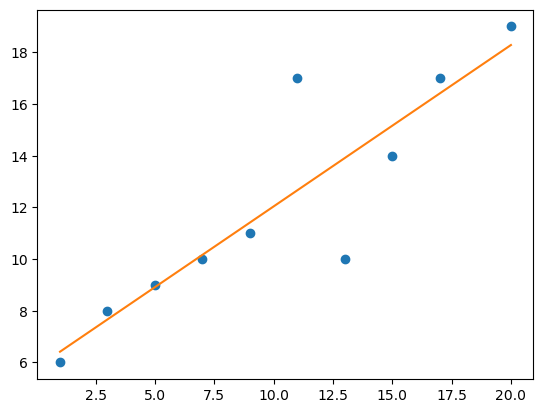

R-squared value is: 0.7870793128067871


In [11]:
import numpy as np 

# Create dummy data
x_values = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 20])
y_values = np.array([6, 8, 9, 10, 11, 17, 10, 14, 17, 19])

# Use polyfit to get best-fit parameters and define updated model
m, b= np.polyfit(x_values, y_values, 1)    # x-values, y-values, and degree of fit so linear would be 1
model = m*x_values + b
print("Slope m =", m, "| Intercept b =", b)

# Plot the points and the best fit line
plt.plot(x_values, y_values, 'o')
plt.plot(x_values, model)
plt.show()

# Now grab the R-squared value from sklearn.metrics
from sklearn.metrics import r2_score
print("R-squared value is:", r2_score(y_values, model))

#### 10.4.2 Quadratic Regression in Python

Let's say that we have data on the number of hour worked per week and a reported happiness level on a scale of 0 to 100 for 16 different people. Let's try to create a scatterplot of this data and find a best-fit curve or model.

a: -0.10698871880667676 b: 7.173061390898327 c: -30.25286763906014


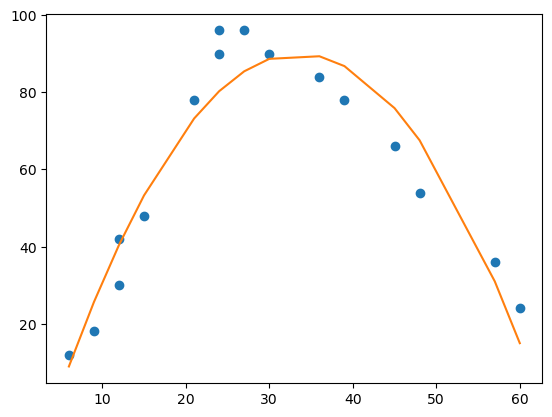

R-squared value is: 0.9092114182131679


In [12]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Provided data
hours = np.array([6, 9, 12, 12, 15, 21, 24, 24, 27, 30, 36, 39, 45, 48, 57, 60])
happy = np.array([12, 18, 30, 42, 48, 78, 90, 96, 96, 90, 84, 78, 66, 54, 36, 24])

# Visually, we can see there's an upside down "U" shaped curve
# We see a quadratic regression would be a suitable fit
# Let's use polyfit with a degree of 2

# Use polyfit to get best-fit parameters and define updated model
a, b, c = np.polyfit(hours, happy, 2)    # x-values, y-values, and degree of fit so linear would be 1
model_quad = a*hours**2 + b*hours + c
print("a:", a, "b:", b, "c:", c)

# Plot the points and the best fit curve
plt.plot(hours, happy, 'o')
plt.plot(hours, model_quad)
plt.show()

# To define R-squared, we can calculate it manually or do it automatically
from sklearn.metrics import r2_score
print("R-squared value is:", r2_score(happy, model_quad))

### <font color="green">10.5 Practice Problems</font>

Try to answer these problems yourself before the live lectures and tutorials. Feel free to connect with your peers on Discord or on campus if you prefer to work together. If you are struggling with them, we will cover them during live sessions.

#### Problem 10A

Use your Python knowledge to write a function (from first principles) to calculate the coefficient of determination, $R^2$. Test it out on one of the examples above to make sure your code is correct.

#### Problem 10A - Solution

In [13]:
# First we import packages
import numpy as np, matplotlib.pyplot as plt
def fRsquared(x, y, model):
    n = np.size(x)
    x_avg = np.mean(x) 
    y_avg = np.mean(y) 
    f_mod = model # Define model function
    SS_mod = np.sum((f_mod-y_avg)**2) # See SS_mod function above
    SS_tot = np.sum((y-y_avg)**2) # See SS_tot function above
    rsquared = SS_mod/SS_tot
    return rsquared
# Grab a random dataset from above
x_values = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 20])
y_values = np.array([6, 8, 9, 10, 11, 17, 10, 14, 17, 19])
linearmodel = 0.62*x_values + 5.79
r2 = fRsquared(x_values, y_values, linearmodel)
print("The R2 value is given as:", r2)


The R2 value is given as: 0.7758253325621748


#### Problem 10B

You are trying to lose weight. The amount of exercise that is being done is measured in terms of weeks that one is active [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] and the average value of weights is given as follows [64, 65, 56, 62, 59, 56, 55, 55, 50, 49, 49, 48, 45, 47, 46] kg. Plot these data points and test at least two models to see which curve fits best. Present the $R^2$ value as well.

#### Problem 10B - Solution

Slope = -1.4071428571428601 | Intercept = 64.9904761904762


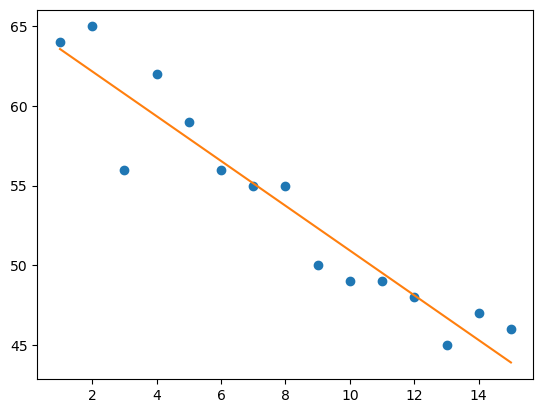

R2 = 0.9015843761615661
a = 0.038461538461537534 | b = -2.022527472527465  | c = 66.73406593406594


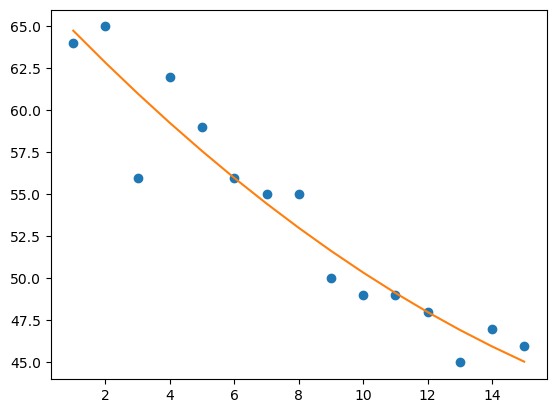

R2 = 0.9115083203873316


In [14]:
import scipy.stats as stats
from sklearn.metrics import r2_score


# Set my data points
xVal = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
yVal = np.array([64, 65, 56, 62, 59, 56, 55, 55, 50, 49, 49, 48, 45, 47, 46])
# Linear fit
mLinear, bLinear = np.polyfit(xVal, yVal, 1) # Fit of degree = 1 (linear)
linearModel = mLinear*xVal + bLinear
print("Slope =", mLinear, "| Intercept =", bLinear)
# Plot linear model and grab R2 value
plt.plot(xVal, yVal, 'o')
plt.plot(xVal, linearModel)
plt.show()
from sklearn.metrics import r2_score
print("R2 =", r2_score(yVal, linearModel))

# Quadratic
aQuad, bQuad, cQuad = np.polyfit(xVal, yVal, 2) # Fit of degree = 2 (quadratic)
quadModel = aQuad*xVal**2 + bQuad*xVal + cQuad
print("a =", aQuad, "| b =", bQuad, " | c =", cQuad)


# Plot quadratic model and grab R2 value
plt.plot(xVal, yVal, 'o')
plt.plot(xVal, quadModel)
plt.show()
print("R2 =", r2_score(yVal, quadModel))